In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Electric_Production.csv")
data.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [3]:
#data.rename(columns={'IPG2211A2N': 'Power'}, inplace=True)
#data.rename(columns={'DATE':"Date"},inplace=True)

In [4]:
data.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [5]:
data.shape

(397, 2)

In [6]:
data['DATE']=pd.to_datetime(data['DATE'],infer_datetime_format=True)
data=data.set_index(['DATE'])


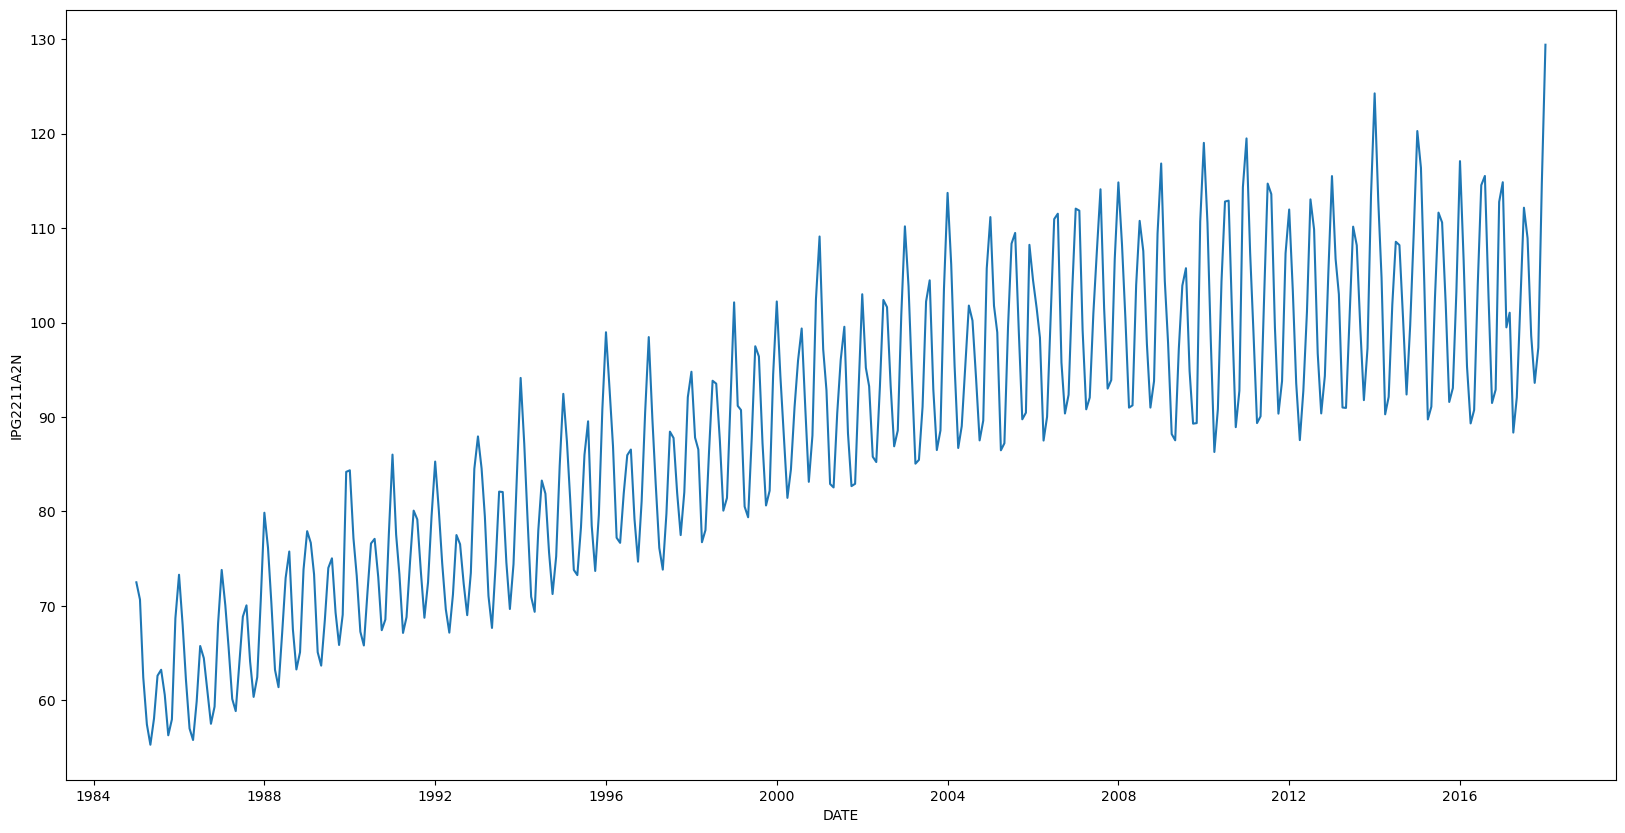

In [7]:
plt.figure(figsize=(20,10))
plt.xlabel('DATE')
plt.ylabel('IPG2211A2N')
plt.plot(data)

In [8]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            IPG2211A2N
DATE                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
1985-06-01         NaN
1985-07-01         NaN
1985-08-01         NaN
1985-09-01         NaN
1985-10-01         NaN
1985-11-01         NaN
1985-12-01   62.165667
1986-01-01   62.232375
1986-02-01   62.008617
1986-03-01   61.989608
            IPG2211A2N
DATE                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
1985-06-01         NaN
1985-07-01         NaN
1985-08-01         NaN
1985-09-01         NaN
1985-10-01         NaN
1985-11-01         NaN
1985-12-01    5.746613
1986-01-01    5.880632
1986-02-01    5.573367
1986-03-01    5.572113


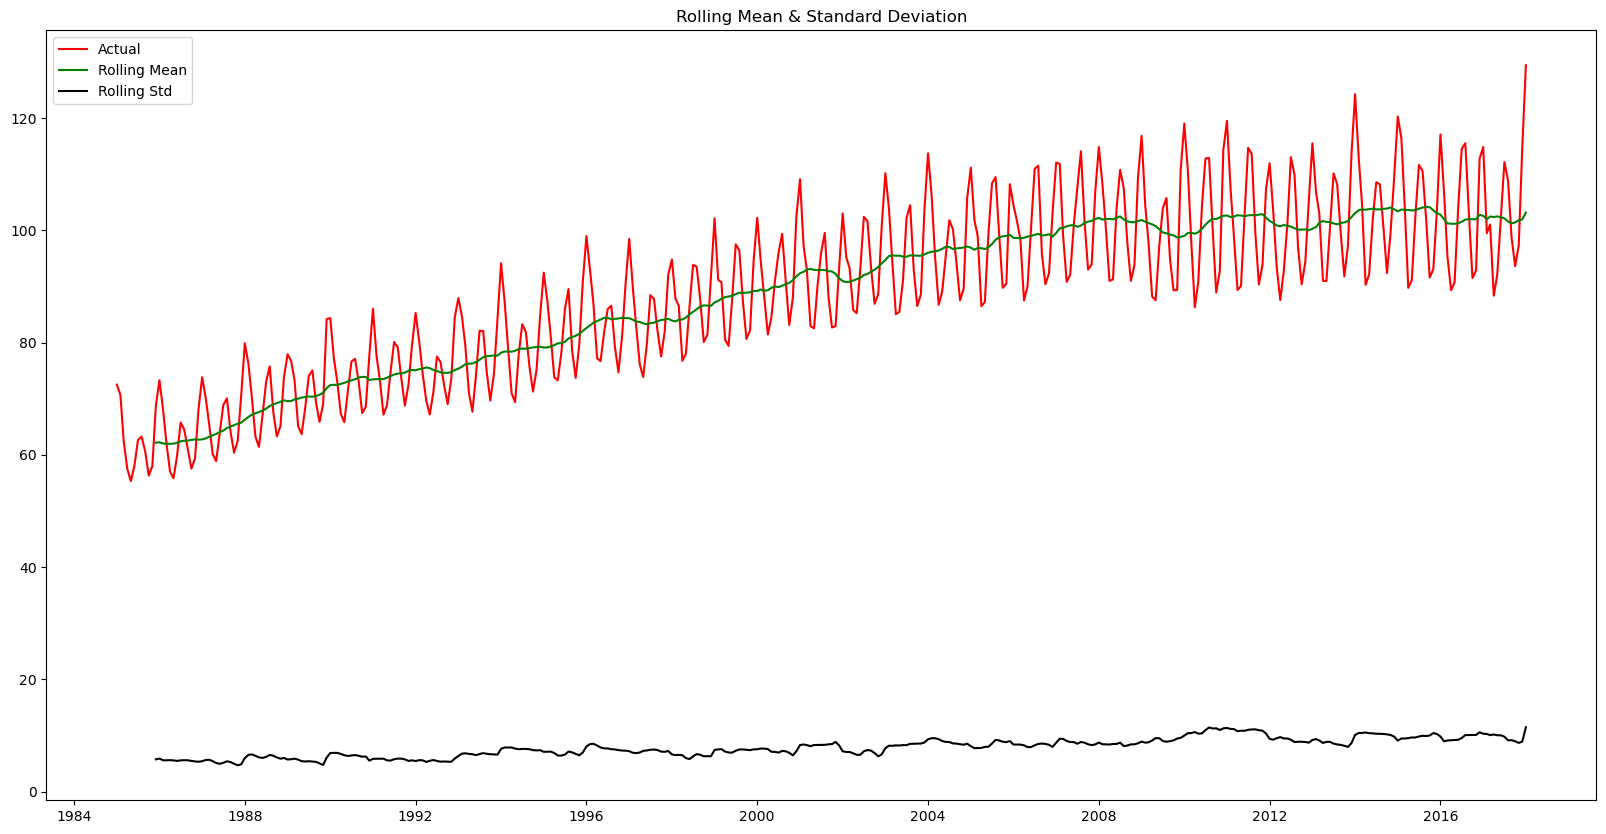

In [9]:
plt.figure(figsize=(20,10))
actual=plt.plot(data,color='red',label="Actual")
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean')
std_6=plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [10]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['IPG2211A2N'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -2.256990
p-value                   0.186215
Lags Used                15.000000
No. of Obs              381.000000
Critical Value (1%)      -3.447631
Critical Value (5%)      -2.869156
Critical Value (10%)     -2.570827
dtype: float64


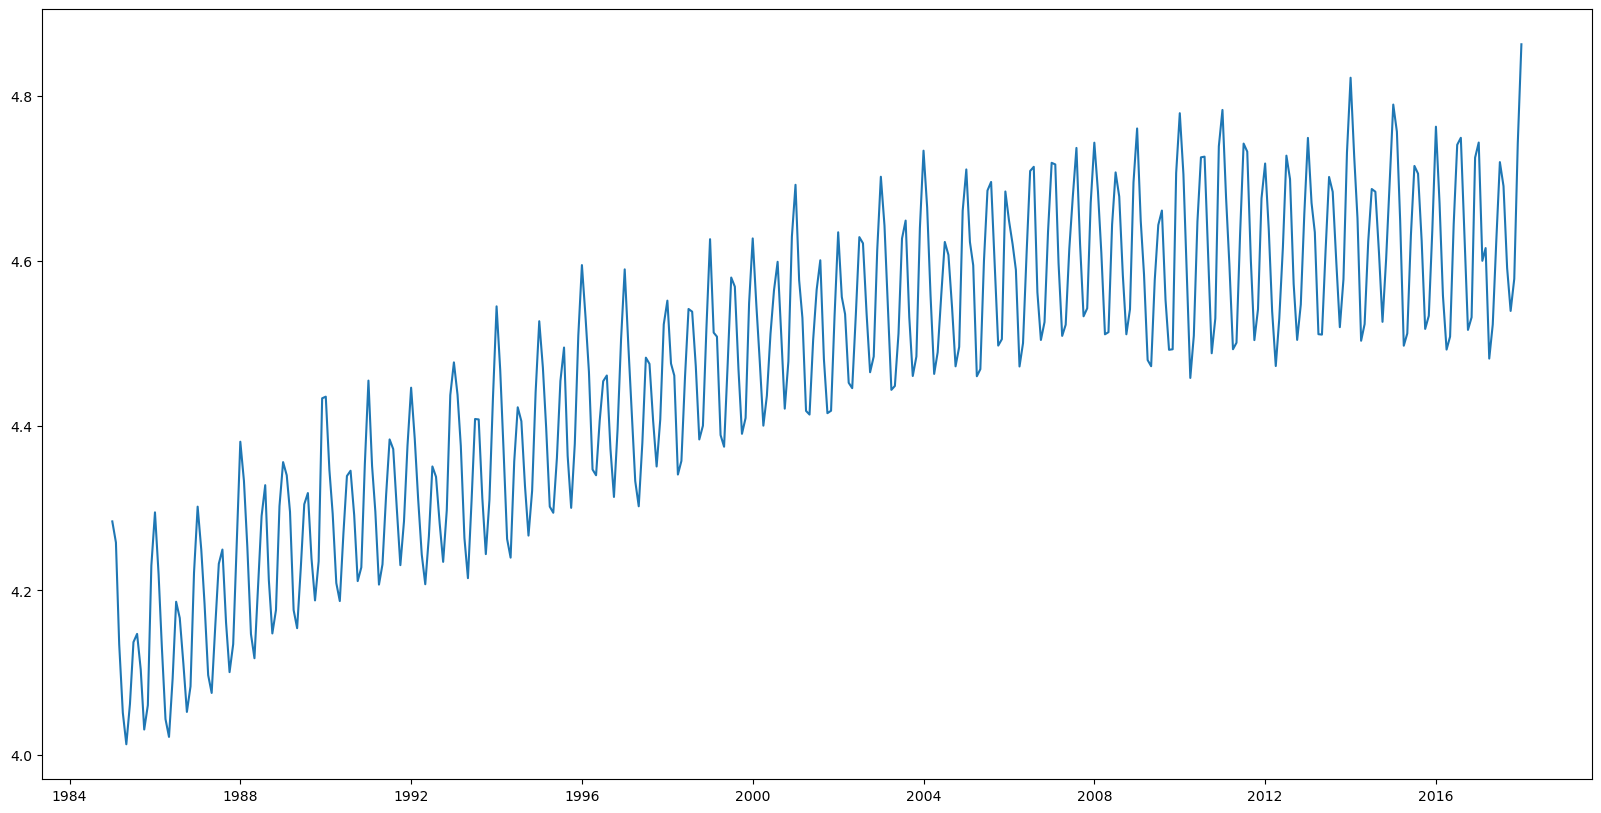

In [11]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

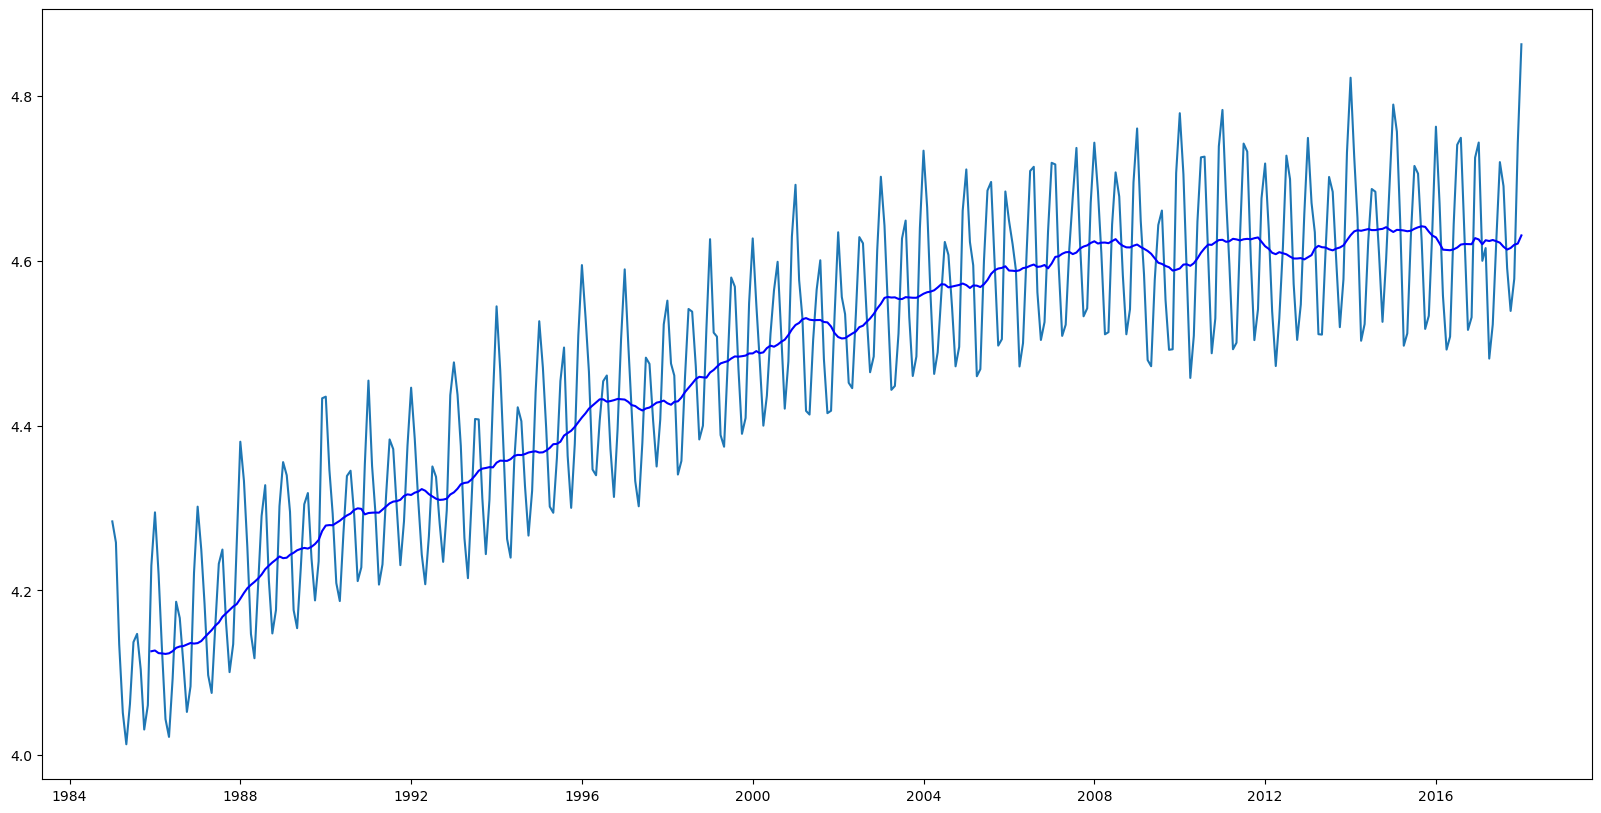

In [12]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [13]:
data_log_diff=data_log-MAvg
data_log_diff.head(15)

,IPG2211A2N
DATE,
1985-01-01,NaN
1985-02-01,NaN
1985-03-01,NaN
1985-04-01,NaN
1985-05-01,NaN
1985-06-01,NaN
1985-07-01,NaN
1985-08-01,NaN
1985-09-01,NaN


In [14]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,IPG2211A2N
DATE,
1985-12-01,0.103961
1986-01-01,0.167724
1986-02-01,0.095629
1986-03-01,0.007329
1986-04-01,-0.079115


In [64]:
def stationarity(timeseries, column='IPG2211A2N'):
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20, 10))
    plt.plot(timeseries, color='red', label='Actual')
    plt.plot(rolmean, color='green', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print('Dickey-Fuller Test: ')
    dftest = adfuller(timeseries[column], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'No. of Obs'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)



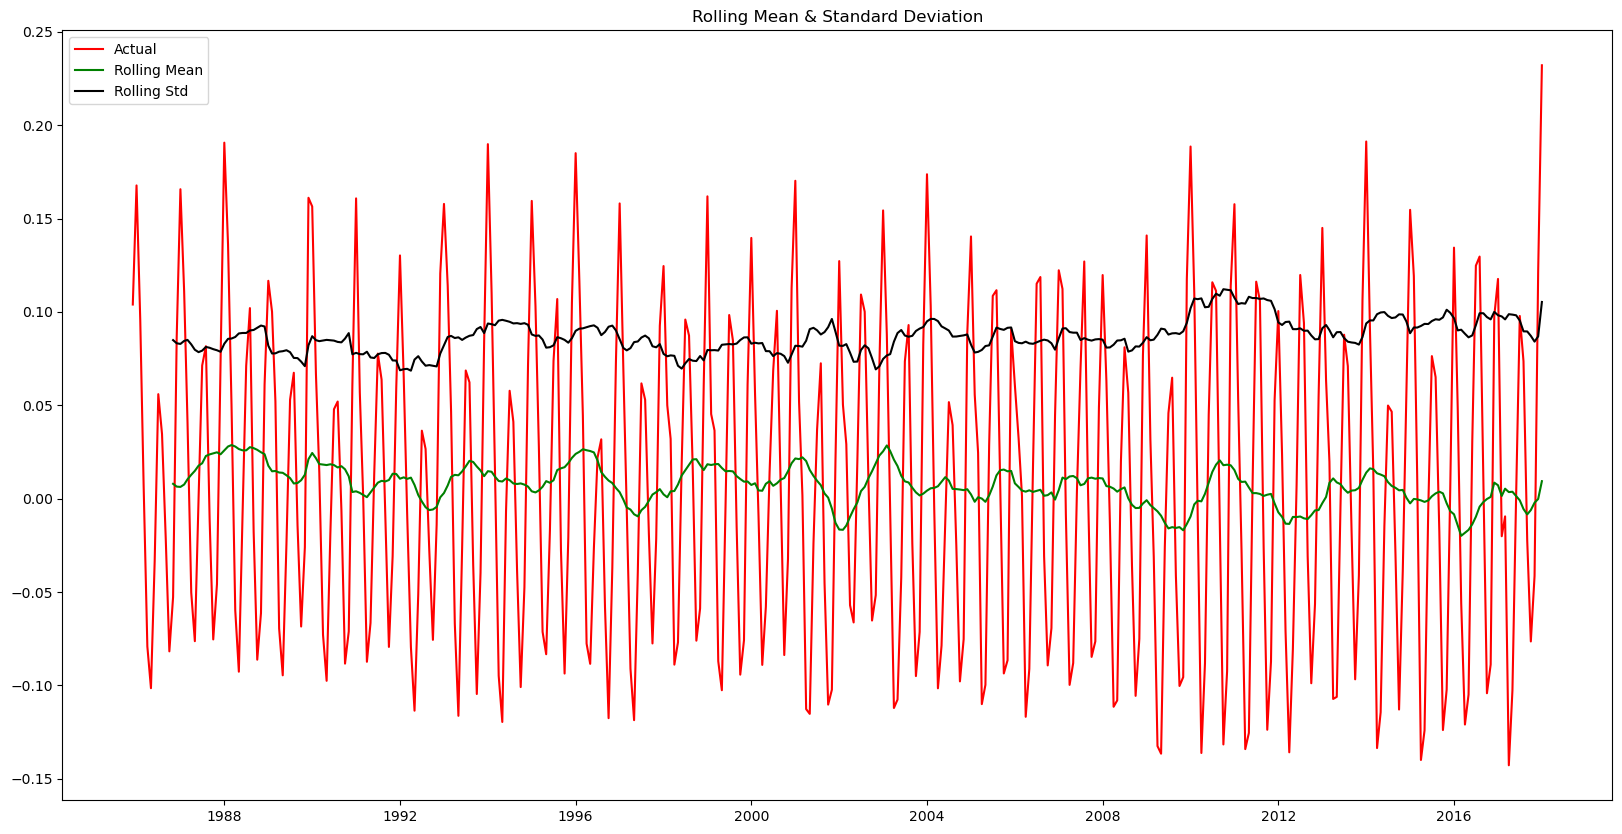

Dickey-Fuller Test: 
Test Statistic           -5.211586
p-value                   0.000008
Lags Used                15.000000
No. of Obs              370.000000
Critical Value (1%)      -3.448148
Critical Value (5%)      -2.869383
Critical Value (10%)     -2.570948
dtype: float64


In [66]:
stationarity(data_log_diff)

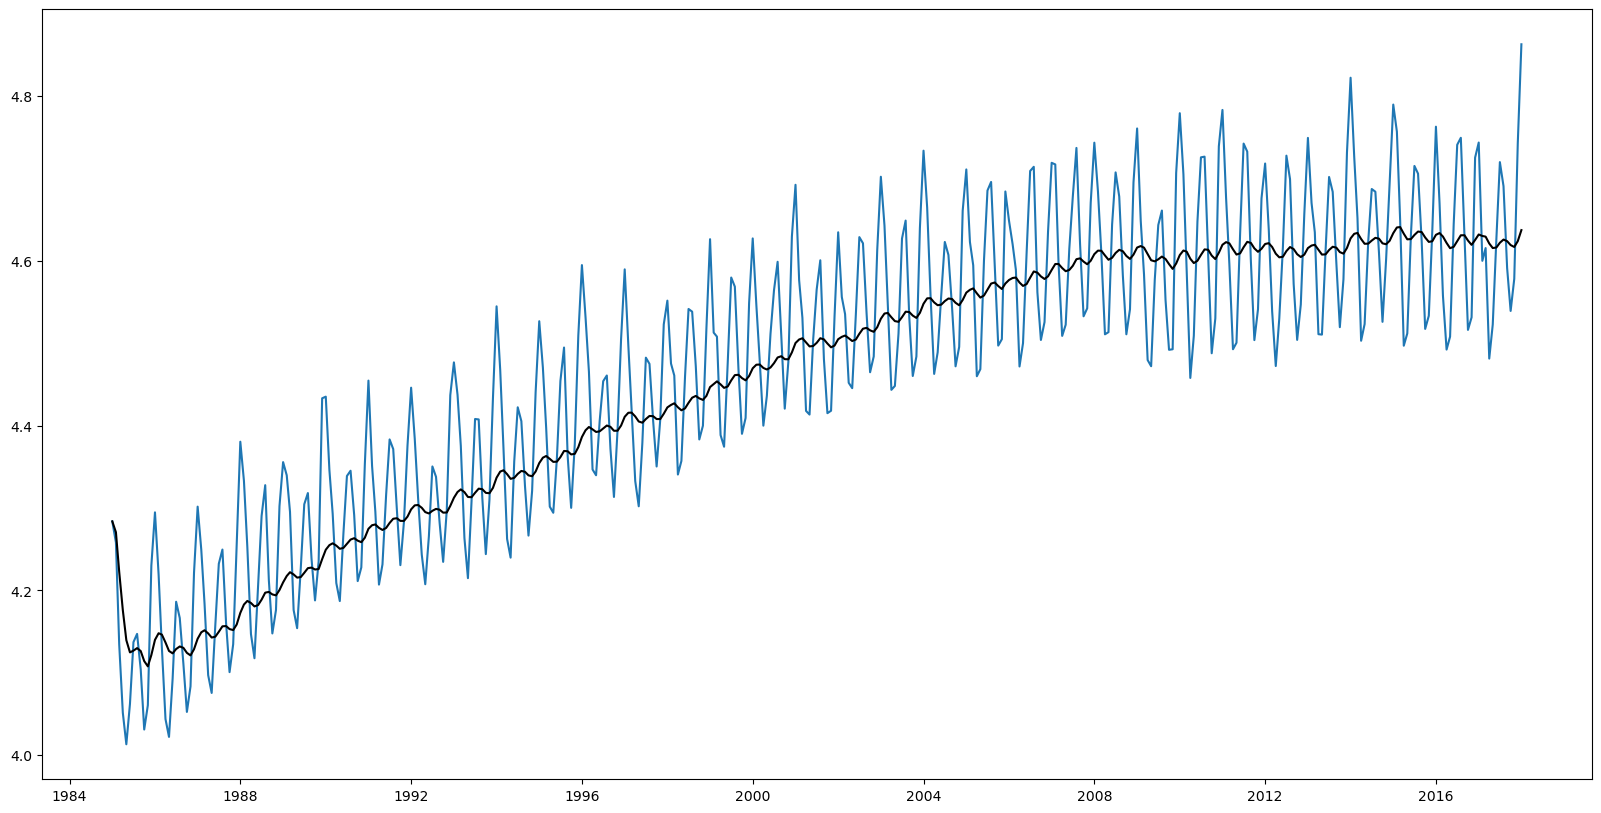

In [17]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

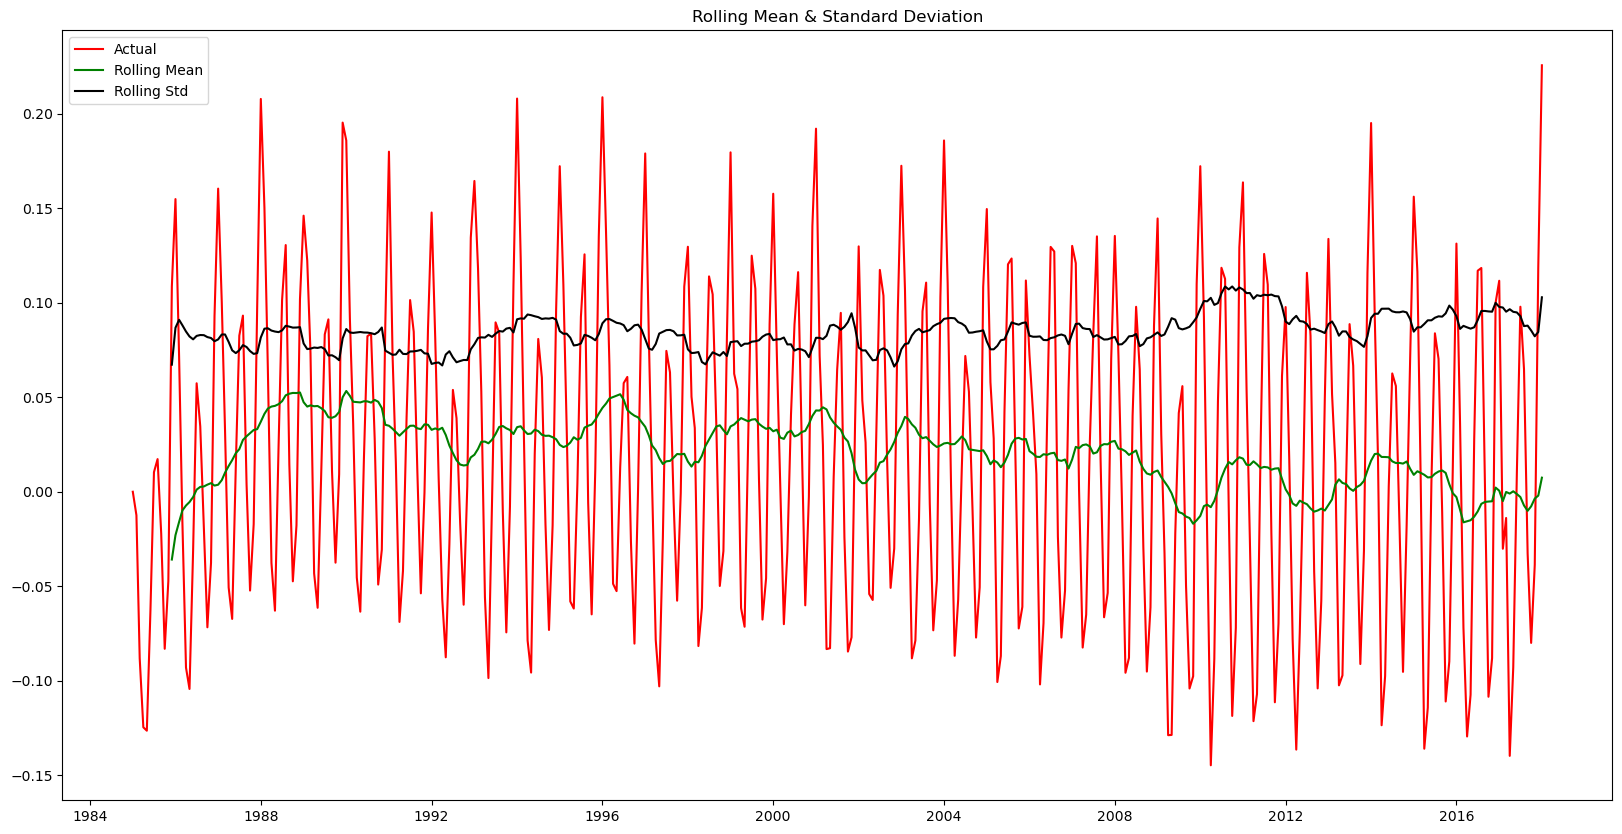

Dickey-Fuller Test: 
Test Statistic           -3.251531
p-value                   0.017189
Lags Used                15.000000
No. of Obs              381.000000
Critical Value (1%)      -3.447631
Critical Value (5%)      -2.869156
Critical Value (10%)     -2.570827
dtype: float64


In [18]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

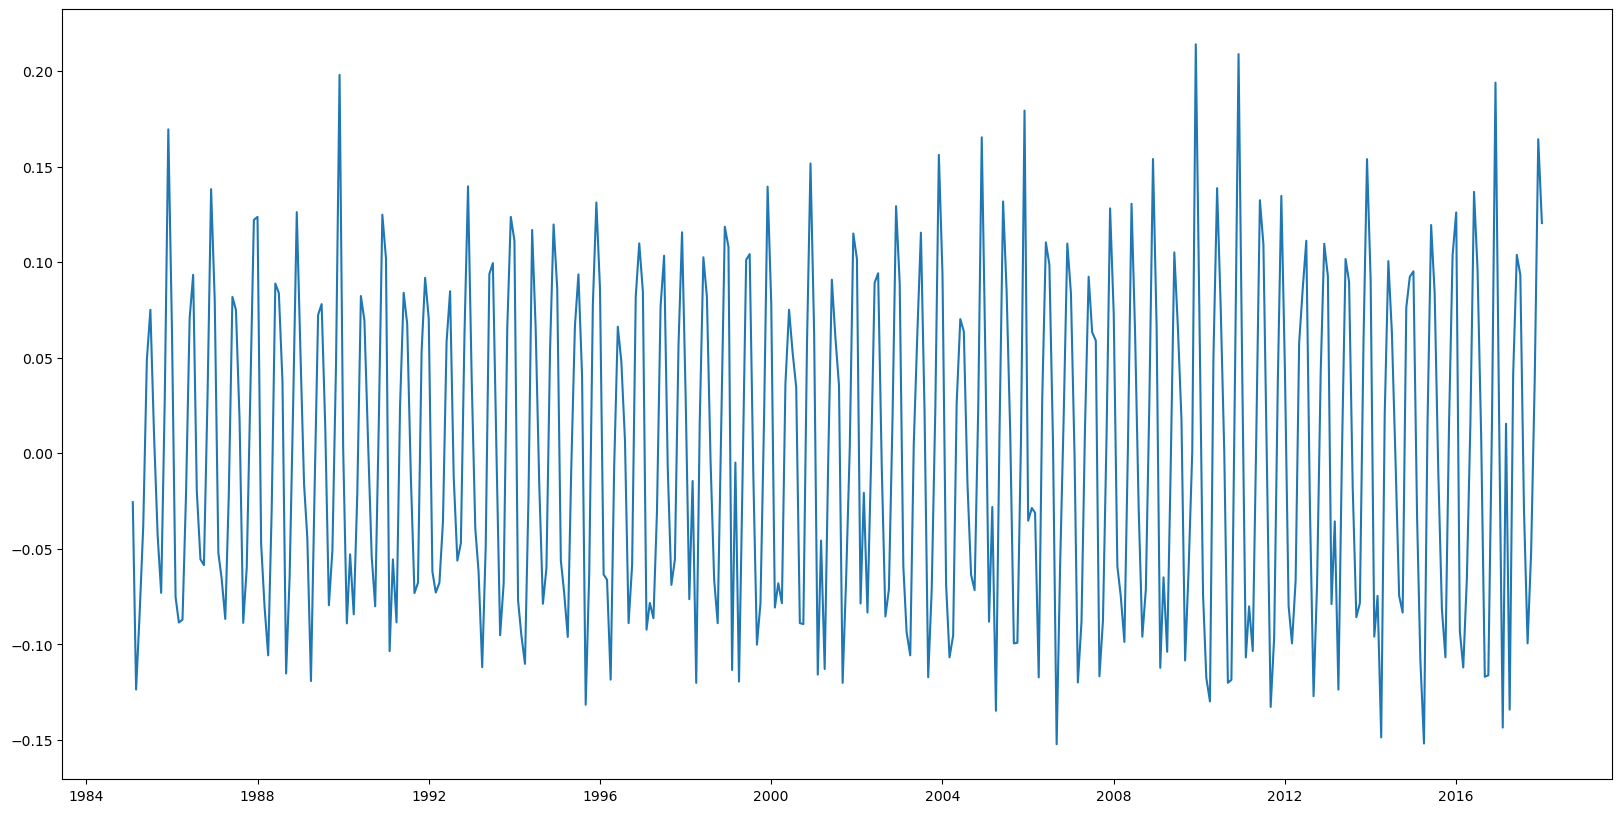

In [19]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

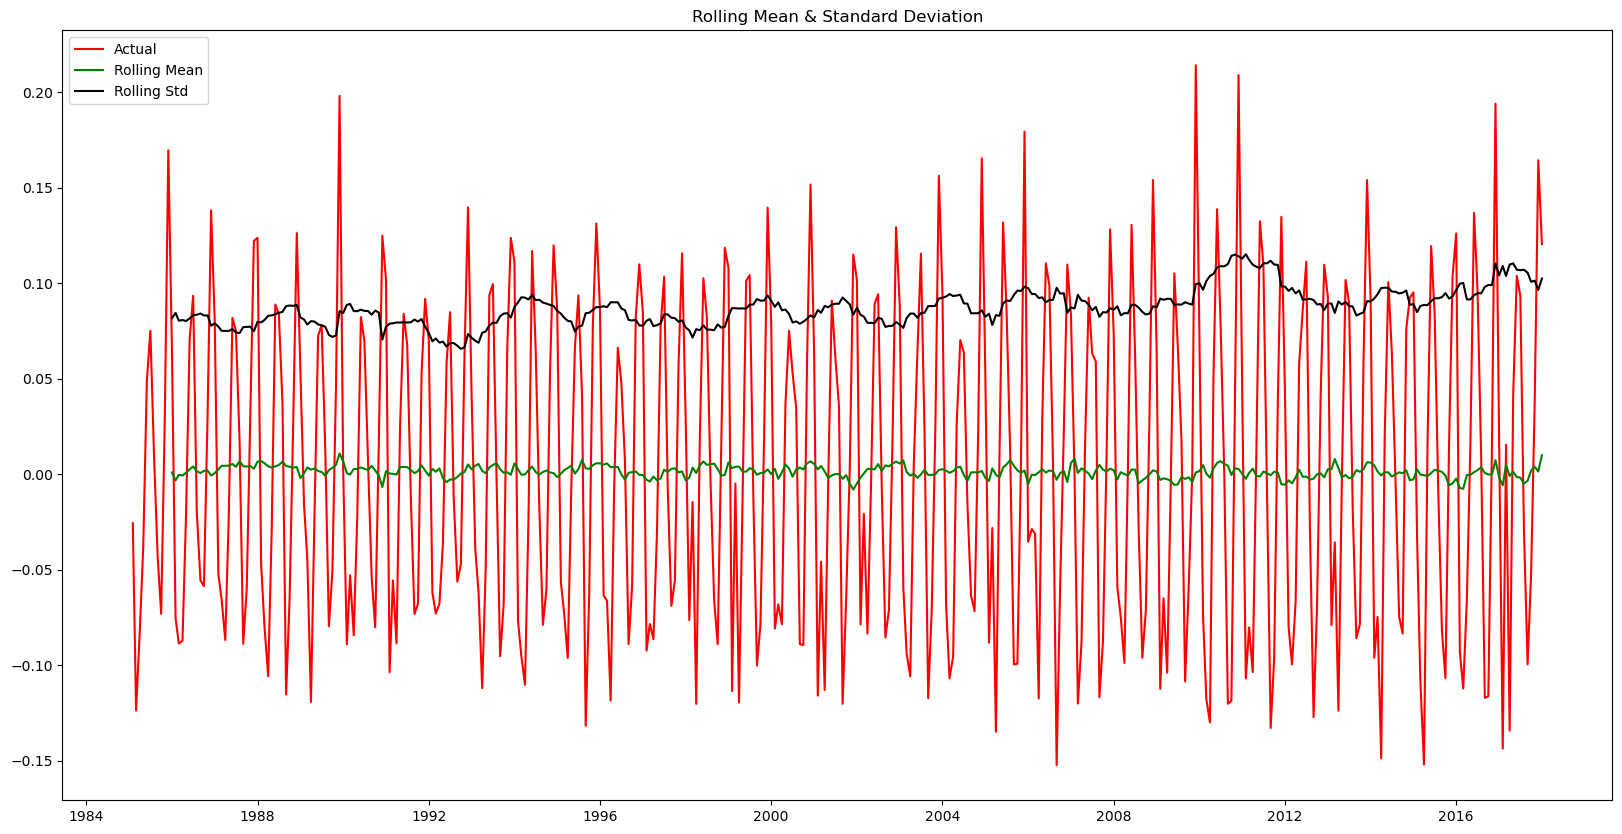

Dickey-Fuller Test: 
Test Statistic         -6.748333e+00
p-value                 2.995161e-09
Lags Used               1.400000e+01
No. of Obs              3.810000e+02
Critical Value (1%)    -3.447631e+00
Critical Value (5%)    -2.869156e+00
Critical Value (10%)   -2.570827e+00
dtype: float64


In [20]:
data_shift=data_shift.dropna()
stationarity(data_shift)

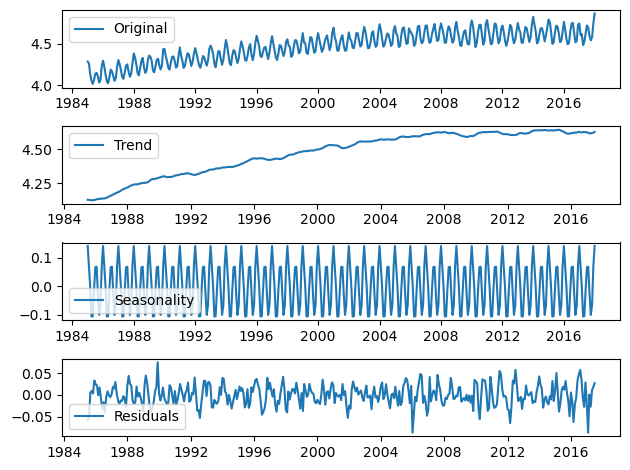

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [85]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


In [89]:
data_log = np.log(data)
data_log

,IPG2211A2N
DATE,
1985-01-01,4.283658
1985-02-01,4.258049
1985-03-01,4.134369
1985-04-01,4.051287
1985-05-01,4.013046
...,...
2017-09-01,4.591227
2017-10-01,4.539177
2017-11-01,4.578168


In [96]:
data_diff = data_log.diff().dropna()

In [98]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


<Figure size 1200x600 with 0 Axes>

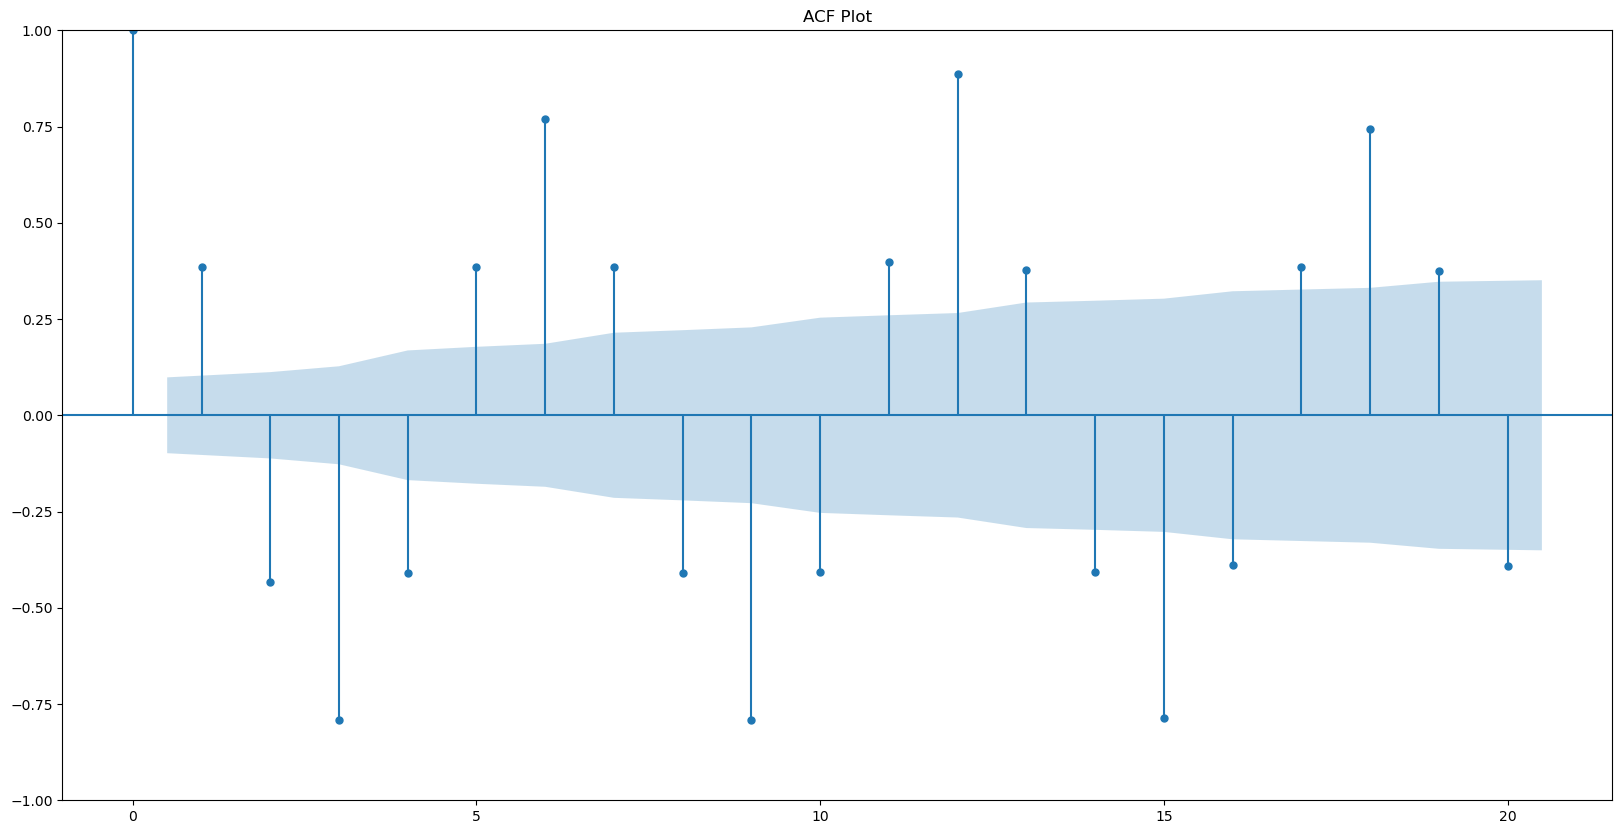

In [100]:
plt.figure(figsize=(12, 6))
plot_acf(data_diff, lags=20)
plt.title('ACF Plot')
plt.show()

<Figure size 1200x600 with 0 Axes>

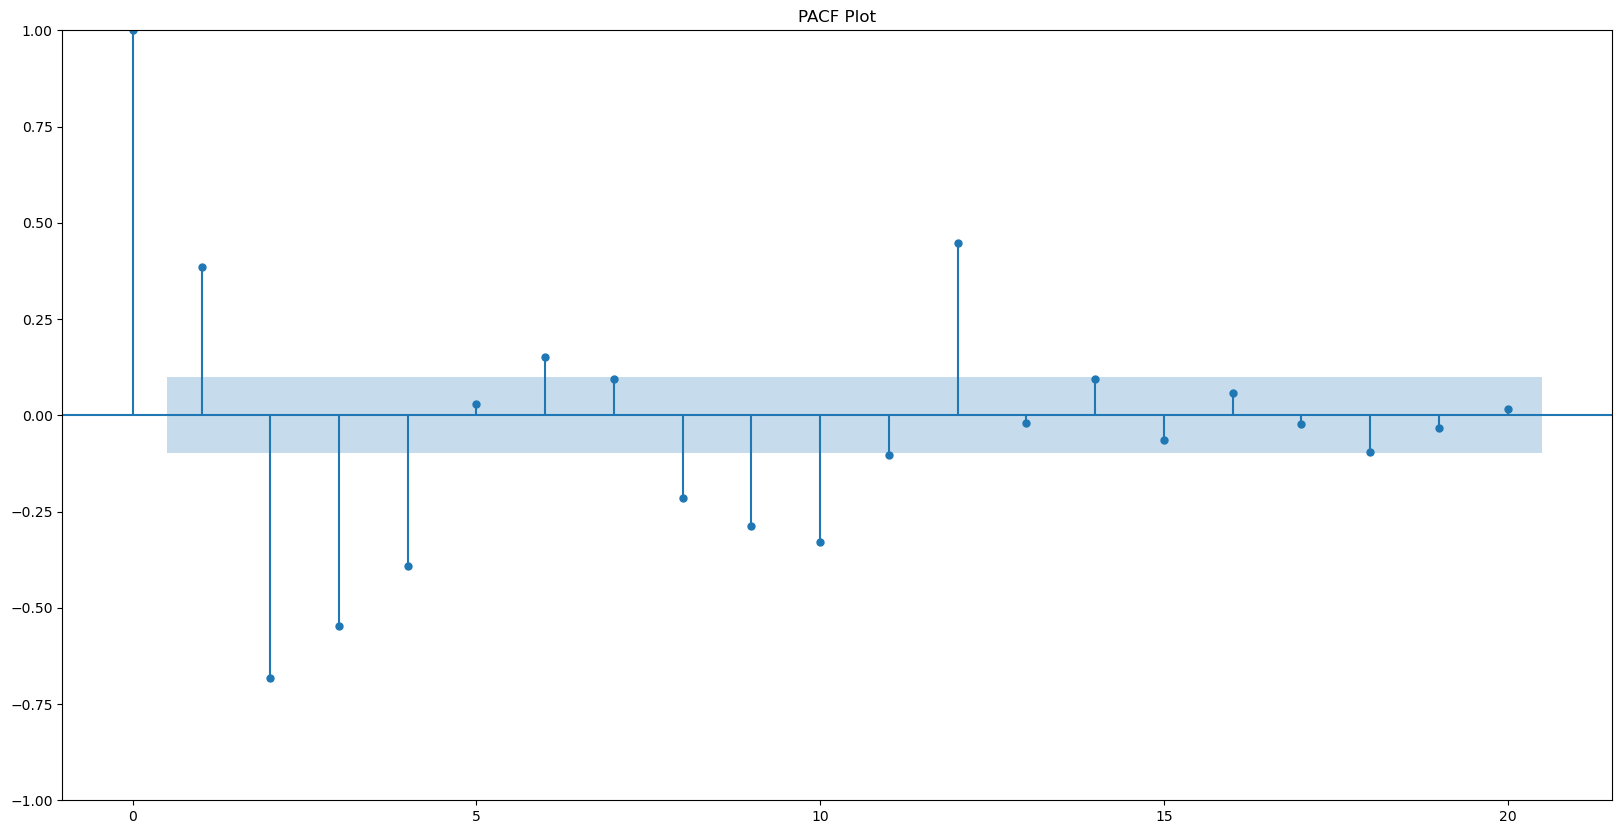

In [102]:
plt.figure(figsize=(12, 6))
plot_pacf(data_diff, lags=20)
plt.title('PACF Plot')
plt.show()

In [118]:
p = 2  # Example value for AR term
d = 1  # Differencing order
q = 2  # value for MA term

In [120]:
model = ARIMA(data_log, order=(p, d, q))
model_fit = model.fit()

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [122]:
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             IPG2211A2N   No. Observations:                  397
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 754.807
Date:                Sun, 29 Sep 2024   AIC                          -1499.613
Time:                        22:06:27   BIC                          -1479.706
Sample:                    01-01-1985   HQIC                         -1491.727
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9993      0.001    986.733      0.000       0.997       1.001
ar.L2         -0.9998      0.000  -3877.406      0.000      -1.000      -0.999
ma.L1         -1.0339      0.078    -13.238      0.0

In [124]:
forecast = model_fit.forecast(steps=12)  # Forecast the next 12 periods

In [126]:
forecast

2018-02-01    4.823885
2018-03-01    4.699084
2018-04-01    4.613423
2018-05-01    4.652602
2018-06-01    4.777401
2018-07-01    4.862941
2018-08-01    4.823644
2018-09-01    4.698848
2018-10-01    4.613428
2018-11-01    4.652842
2018-12-01    4.777636
2019-01-01    4.862936
Freq: MS, Name: predicted_mean, dtype: float64

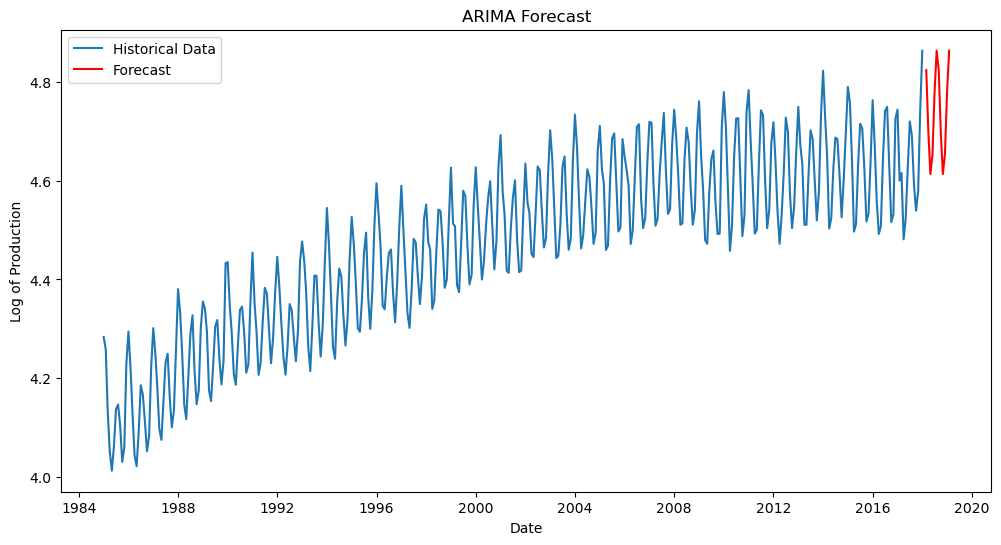

In [128]:
plt.figure(figsize=(12, 6))
plt.plot(data_log, label='Historical Data')
plt.plot(pd.date_range(start=data_log.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Log of Production')
plt.legend()
plt.show()
